# INCOME PREDICTION

### INTRODUCTION

The dataset is taken from 1994 Census Income database, where the task is to predict whether a person with certain attributes/features makes more than $50,000 annually.

In [3]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [67]:
censusdf=pd.read_csv("censusIncome.csv")

In [4]:
censusdf

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratory data analysis (EDA)

In [21]:
censusdf.shape

(30693, 15)

In [22]:
censusdf.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [59]:
censusdf.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary
count,30693.000000,3.069300e+04,30693.000000,30693.000000,30693.000000,30693.000000,30693.000000
mean,38.447594,1.898519e+05,10.131463,1106.867136,88.982634,40.952791,0.249177
std,13.115368,1.054649e+05,2.561269,7500.850126,405.814442,11.984561,0.432544
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.372940e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


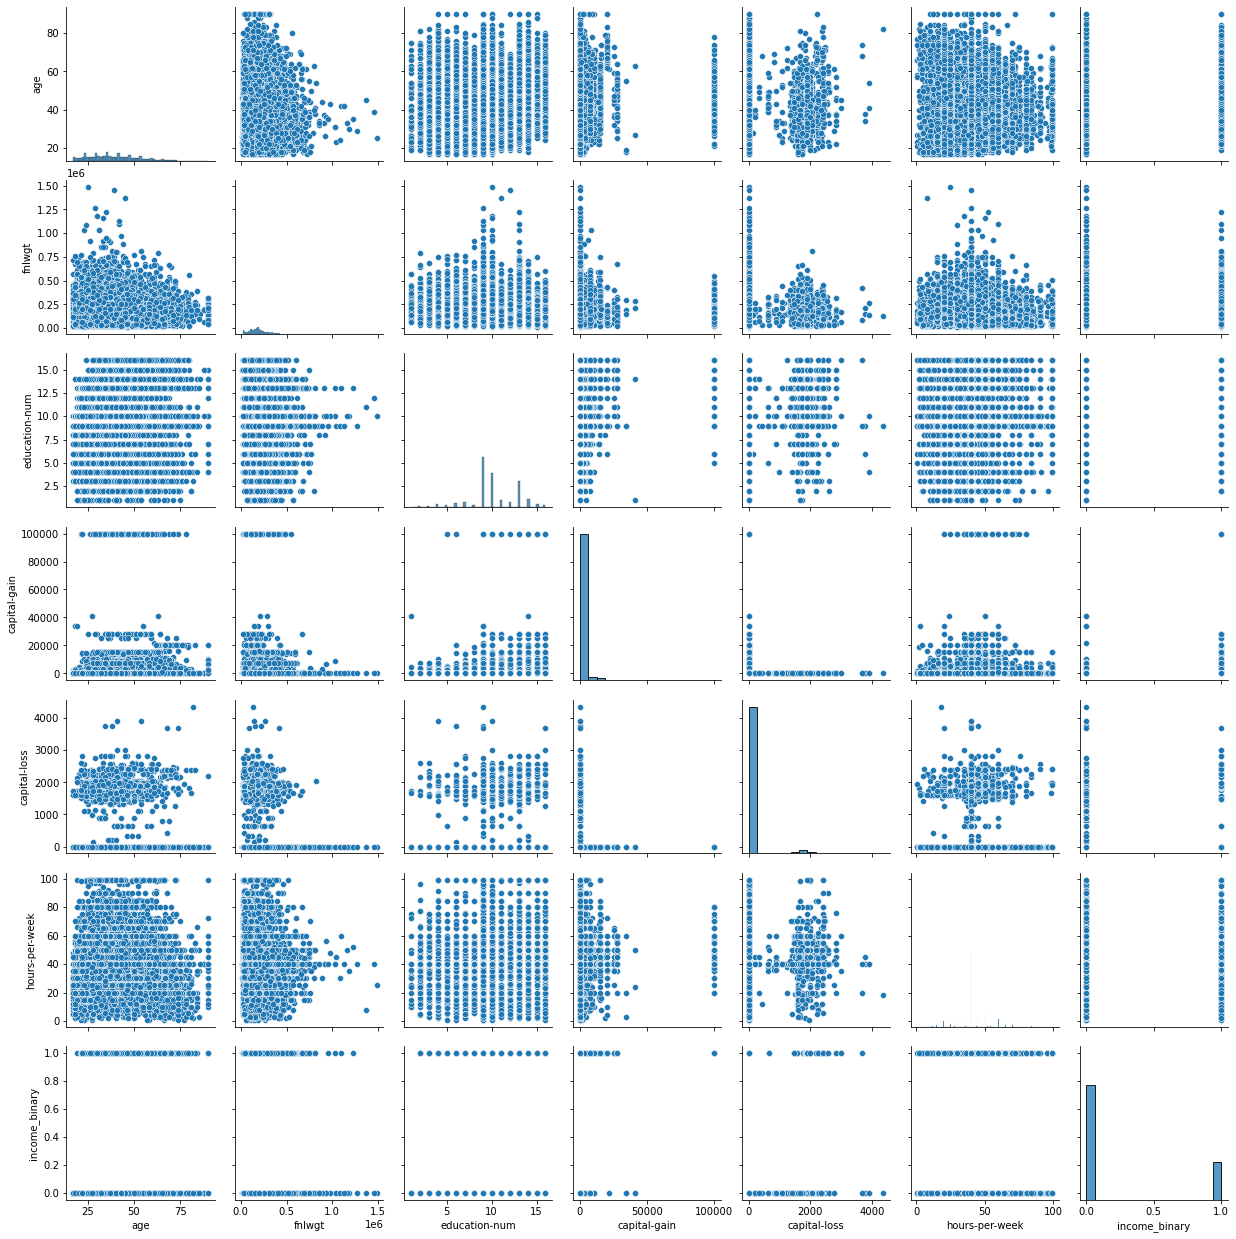

In [60]:
sns.pairplot(censusdf)

In [183]:
from pandas_profiling import ProfileReport

In [184]:
profile=ProfileReport(censusdf,explorative=True)

In [185]:
profile.to_file('censusIncome.html')

<AxesSubplot:ylabel='income'>

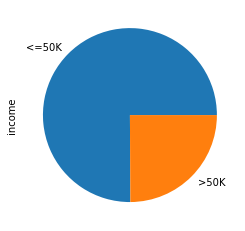

In [61]:
censusdf['income'].value_counts().plot(kind='pie')

<AxesSubplot:>

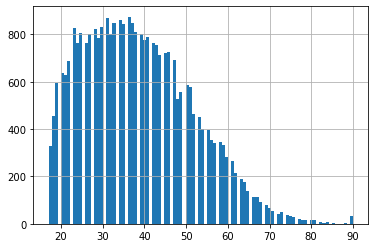

In [62]:
censusdf['age'].hist(bins=100)

<AxesSubplot:>

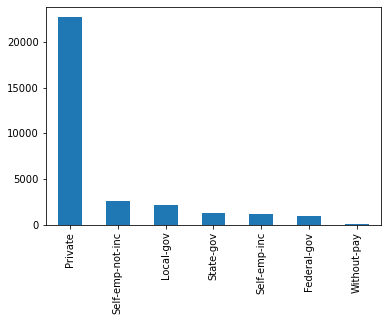

In [63]:
censusdf['workclass'].value_counts().plot.bar()

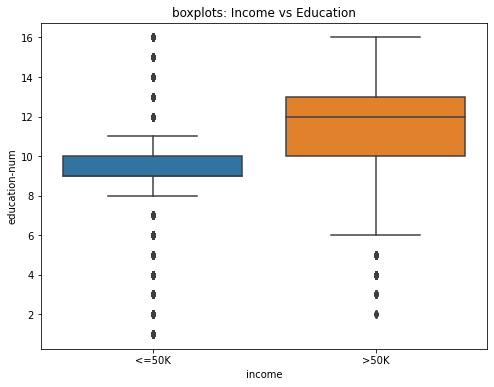

In [10]:
plt.figure(figsize=(8,6))
plt.title('boxplots: Income vs Education')
sns.boxplot(data=censusdf,y='education-num',x='income')
plt.show()

#### The boxplot between Income and Education indicates that those who have income >50K have higher education than those who have income <50K.

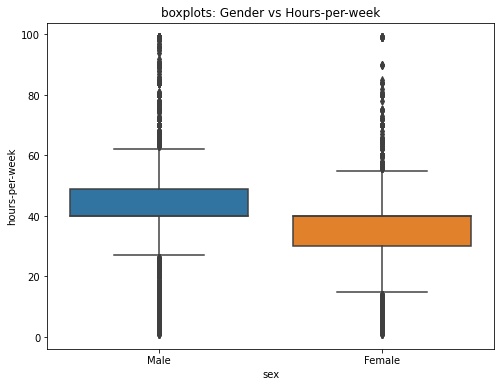

In [11]:
plt.figure(figsize=(8,6))
plt.title('boxplots: Gender vs Hours-per-week')
sns.boxplot(data=censusdf,y='hours-per-week',x='sex')
plt.show()

#### The boxplot shows that Male has center of work hours per week higher than that of Female.

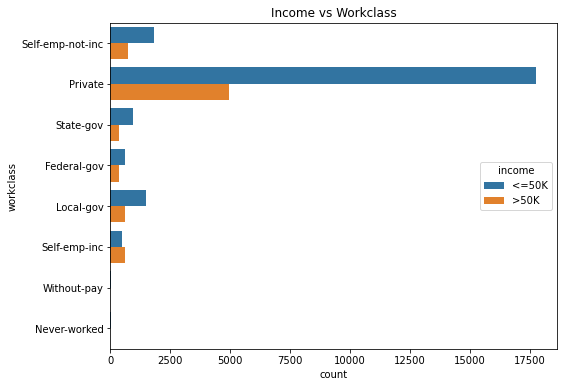

In [12]:
plt.figure(figsize=(8,6))
plt.title('Income vs Workclass')
sns.countplot(y='workclass',hue='income',data =censusdf)
plt.show()

#### The charts show most people (income >50K and <=50K) are working for private organizations.

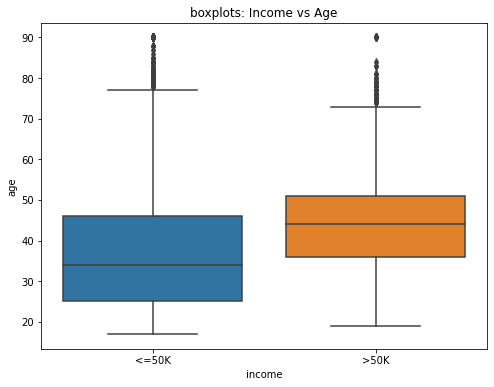

In [13]:
plt.figure(figsize=(8,6))
plt.title('boxplots: Income vs Age')
sns.boxplot(data=censusdf,y='age',x='income')
plt.show()

#### The boxplot indicates that those who have income >50K is centered from 35 to 50 years old which is higher than those who have income <50K (centered from 25 to 45 years old)

<AxesSubplot:>

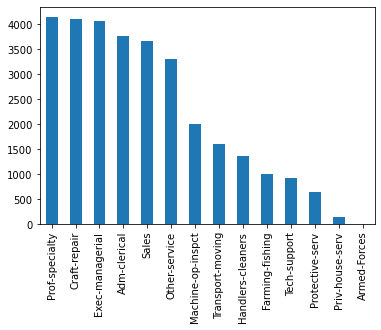

In [14]:
censusdf['occupation'].value_counts().plot(kind='bar')

# Clean the data

### A. Finding and removing duplicated observations

In [10]:
duplicate = censusdf[censusdf.duplicated()]
len(duplicate)

24

#### There are 24 duplicated observations founded, therefore I will remove them.

In [64]:
censusdf=censusdf.drop_duplicates()

### B. Finding null values

In [68]:
censusdf.isnull().values.any()

True

In [69]:
censusdf.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

#### There are 1836 missing values in workclass, 1843 missing values in occupation, and 583 missing values in native-country. 
#### Since workclass is categorical and "private" accounts for the majority in data, I will replace missing values by mode.
#### I will drop off missing values in occupation because many occupations have same ratio, and replace missing values in native-country by 'Not-specified'


### C. Filling missing values 

In [14]:
censusdf['workclass'].fillna(censusdf['workclass'].mode()[0], inplace=True)

In [15]:
censusdf.dropna(subset=['occupation'],inplace=True)

In [16]:
censusdf['native-country'].fillna('Not-specified',inplace=True)

In [17]:
censusdf.isnull().values.any()

False

In [70]:
censusdf

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### C. Reducing categorical values

In [71]:
reducing_education = {
    'Bachelors': 'Undergrad',
    'Some-college': 'Undergrad', 
    '11th': 'Other',
    'HS-grad': 'Other', 
    'Prof-school': 'Other',
    'Assoc-acdm': 'Other',
    'Assoc-voc': 'Other',
    '9th': 'Other',
    '7th-8th': 'Other',
    '12th': 'Other',
    'Masters': 'Postgrad',
    '1st-4th': 'Other',
    '10th': 'Other',
    'Doctorate': 'Postgrad',
    '5th-6th': 'Other',
    'Preschool': 'Other'
}

In [72]:
censusdf['reduced-education'] =censusdf['education'].map(reducing_education)

In [21]:
continents= {
    'United-States' : 'America', 
    'Cambodia':' Asia', 
    'England':'Europe',
    'Puerto-Rico':'America',
    'Canada':'America',
    'Germany':'Europe',
    'Outlying-US(Guam-USVI-etc)':'America',
    'India':'Asia',
    'Japan':'Asia',
    'Greece':'Europe',
    'South' : 'America',
    'China':'Asia',
    'Cuba':'America', 
    'Iran':'Asia', 
    'Honduras':'America',
    'Philippines':'Aisa', 
    'Italy':'Europe',
    'Poland':'Europe',
    'Jamaica':'America', 
    'Vietnam':'Asia',
    'Mexico':'America',
    'Portugal':'Europe',
    'Ireland':'Europe',
    'France':'Europe',
    'Dominican-Republic':'America',
    'Laos':'Asia', 
    'Ecuador':'America',
    'Taiwan':'Asia',
    'Haiti':'America', 
    'Columbia':'America', 
    'Hungary':'Europe',
    'Guatemala':'America', 
    'Nicaragua':'America', 
    'Scotland':'Europe', 
    'Thailand':'Aisa', 
    'Yugoslavia':'Europe',
    'El-Salvador':'America',
    'Trinadad&Tobago':'America',
    'Peru':'America',
    'Hong':'Asia',
    'Holand-Netherlands':'Europe'
}

In [73]:
censusdf['continent'] = censusdf['native-country'].map(continents)

In [74]:
reducing_status= {
    'Married-civ-spouse':'Married',
    'Divorced':'Other',
    'Never-married':'Single',
    'Separated':'Other',
    'Widowed':'Other',
    'Married-spouse-absent':'Married',
    'Married-AF-spouse':'Married'
}

In [75]:
censusdf['reduced-status'] = censusdf['marital-status'].map(reducing_status)

In [76]:
reducing_occupation= {
    'Tech-support':'Skilled worker',
    'Craft-repair':'Skilled worker',
    'Other-service':'Other',
    'Sales':'Professional worker',
    'Exec-managerial':'Professional worker',
    'Prof-specialty': 'Professional worker', 
    'Handlers-cleaners' : 'Skilled worker',
    'Machine-op-inspct':'Skilled worker',
    'Adm-clerical':'Other', 
    'Farming-fishing':'Other',
    'Transport-moving':'Other', 
    'Priv-house-serv':'Other',
    'Protective-serv':'Other', 
    'Armed-Forces': 'Millitary'
}

In [77]:
censusdf['reduced-occupation'] = censusdf['occupation'].map(reducing_occupation)

In [78]:
censusdf.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,reduced-education,continent,reduced-status,reduced-occupation
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Undergrad,America,Married,Professional worker
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Other,America,Other,Skilled worker
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Other,America,Married,Skilled worker
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Undergrad,America,Married,Professional worker
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Postgrad,America,Married,Professional worker


# Preprocessing the Data

In [83]:
def func(value):
    if value=='>50K':
        return 1
    else:
        return 0

In [84]:
censusdf['income_binary']=censusdf['income'].apply(func)

In [85]:
censusdf.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,reduced-education,continent,reduced-status,reduced-occupation,income_binary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Undergrad,America,Married,Professional worker,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Other,America,Other,Skilled worker,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Other,America,Married,Skilled worker,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Undergrad,America,Married,Professional worker,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Postgrad,America,Married,Professional worker,0


####  Since education and education-num has same meaning, I will drop education-num variable to avoid multicollinearity and other variables which already replaced by reduced categories variables. I also drop fnlwgt because it has no relationship with income.

In [86]:
censusdf2=censusdf.drop(columns=['fnlwgt','education','education-num','native-country','marital-status','occupation','income'])

In [87]:
censusdf2

,age,workclass,relationship,race,sex,capital-gain,capital-loss,hours-per-week,reduced-education,continent,reduced-status,reduced-occupation,income_binary
0,50,Self-emp-not-inc,Husband,White,Male,0,0,13,Undergrad,America,Married,Professional worker,0
1,38,Private,Not-in-family,White,Male,0,0,40,Other,America,Other,Skilled worker,0
2,53,Private,Husband,Black,Male,0,0,40,Other,America,Married,Skilled worker,0
3,28,Private,Wife,Black,Female,0,0,40,Undergrad,America,Married,Professional worker,0
4,37,Private,Wife,White,Female,0,0,40,Postgrad,America,Married,Professional worker,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Wife,White,Female,0,0,38,Other,America,Married,Skilled worker,0
32556,40,Private,Husband,White,Male,0,0,40,Other,America,Married,Skilled worker,1
32557,58,Private,Unmarried,White,Female,0,0,40,Other,America,Other,Other,0
32558,22,Private,Own-child,White,Male,0,0,20,Other,America,Single,Other,0


In [88]:
x=censusdf2.drop(columns='income_binary')
y=censusdf2['income_binary']

In [89]:
x

,age,workclass,relationship,race,sex,capital-gain,capital-loss,hours-per-week,reduced-education,continent,reduced-status,reduced-occupation
0,50,Self-emp-not-inc,Husband,White,Male,0,0,13,Undergrad,America,Married,Professional worker
1,38,Private,Not-in-family,White,Male,0,0,40,Other,America,Other,Skilled worker
2,53,Private,Husband,Black,Male,0,0,40,Other,America,Married,Skilled worker
3,28,Private,Wife,Black,Female,0,0,40,Undergrad,America,Married,Professional worker
4,37,Private,Wife,White,Female,0,0,40,Postgrad,America,Married,Professional worker
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Wife,White,Female,0,0,38,Other,America,Married,Skilled worker
32556,40,Private,Husband,White,Male,0,0,40,Other,America,Married,Skilled worker
32557,58,Private,Unmarried,White,Female,0,0,40,Other,America,Other,Other
32558,22,Private,Own-child,White,Male,0,0,20,Other,America,Single,Other


In [90]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: income_binary, Length: 32560, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

In [37]:
x=pd.get_dummies(x,drop_first=True)

In [38]:
x

,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,reduced-education_Undergrad,continent_Aisa,continent_America,continent_Asia,continent_Europe,reduced-status_Other,reduced-status_Single,reduced-occupation_Other,reduced-occupation_Professional worker,reduced-occupation_Skilled worker
0,50,0,0,13,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1,38,0,0,40,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,53,0,0,40,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,28,0,0,40,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,37,0,0,40,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0,0,38,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
32556,40,0,0,40,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
32557,58,0,0,40,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
32558,22,0,0,20,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [40]:
x_train

,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,reduced-education_Undergrad,continent_Aisa,continent_America,continent_Asia,continent_Europe,reduced-status_Other,reduced-status_Single,reduced-occupation_Other,reduced-occupation_Professional worker,reduced-occupation_Skilled worker
31756,34,0,0,35,0,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
11104,21,0,0,40,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
32067,21,0,0,40,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
7118,47,0,0,6,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
20277,50,0,0,40,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31259,49,0,0,40,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
11418,39,0,0,45,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
23609,43,0,0,40,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
8876,27,0,0,40,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [41]:
x_test

,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,reduced-education_Undergrad,continent_Aisa,continent_America,continent_Asia,continent_Europe,reduced-status_Other,reduced-status_Single,reduced-occupation_Other,reduced-occupation_Professional worker,reduced-occupation_Skilled worker
18780,47,0,0,35,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
29198,19,0,0,40,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
15618,48,0,0,40,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
27327,31,0,0,50,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
21446,41,0,0,40,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,37,7688,0,50,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
13644,40,0,0,17,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
21506,23,0,0,40,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
8648,31,0,0,60,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


# Selection of Model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model=LogisticRegression()

In [92]:
model.fit(x_train, y_train)

C:\Users\mythi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
model.coef_

array([[ 1.38552930e-02,  3.28182673e-04,  6.46798751e-04,
         2.20939785e-02, -1.20225393e-01, -3.49225260e-01,
        -3.97982423e-03, -8.89996196e-01, -1.59738036e-01,
        -1.22237086e-02, -7.22925287e-01, -3.86576817e-01,
        -1.36632188e+00, -9.57215423e-01,  6.35554060e-01,
        -3.07533491e-01, -4.65516491e-01, -1.29128132e-01,
        -1.64021370e-01,  3.32231295e-01,  9.45826807e-01,
         5.55234923e-01, -3.39962146e-02, -6.29535335e-01,
        -1.87627519e-01, -1.13995543e-01, -1.18579375e+00,
        -1.91492830e+00, -7.10040641e-01,  3.08893654e-01,
        -8.17703916e-01]])

In [47]:
model.score(x_train,y_train)

0.8351873400046544

In [48]:
model.score(x_test,y_test)

0.8365551694178974

#### The model score in test data is 0.8346 which is very close to score of training data, that means the model is not overfitting.

In [49]:
preds=model.predict(x_test)

In [50]:
len(preds)

9208

In [51]:
y_test

18780    0
29198    0
15618    1
27327    0
21446    0
        ..
15725    1
13644    1
21506    0
8648     0
32264    1
Name: income_binary, Length: 9208, dtype: int64

In [52]:
temp_censusdf=pd.DataFrame(
{
    'Predictions':preds,
    'Actual':y_test
})

<AxesSubplot:xlabel='Predictions', ylabel='Actual'>

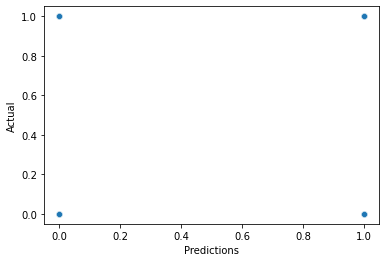

In [53]:
sns.scatterplot(data=temp_censusdf,x='Predictions',y="Actual")

In [54]:
temp_censusdf

,Predictions,Actual
18780,0,0
29198,0,0
15618,1,1
27327,0,0
21446,0,0
...,...,...
15725,1,1
13644,0,1
21506,0,0
8648,0,0


# Confusion matrix

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
a=(confusion_matrix(y_test,preds))
print(a)

[[6302  551]
 [ 954 1401]]


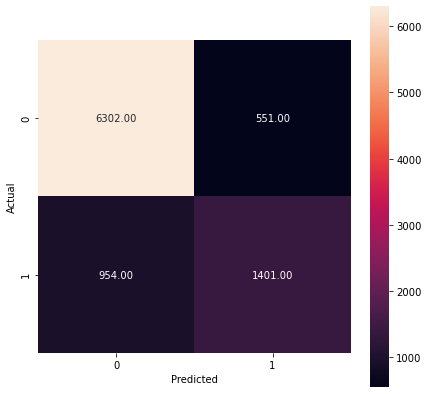

In [57]:
plt.figure(figsize=[7,7])
sns.heatmap(a,annot=True,fmt='.2f',square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### There are 1394 people in total actual 2274 people in test data are predicted to have income >50K correctly, and 643 people having income <=50K are predicted wrongly to be having income >50K.
#### 6291 people in total actual 6934 people are predicted to have income <=50K correctly, and 880 people having income >50K are predicted wrongly to be having income <=50K.


In [58]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6853
           1       0.72      0.59      0.65      2355

    accuracy                           0.84      9208
   macro avg       0.79      0.76      0.77      9208
weighted avg       0.83      0.84      0.83      9208



#### Precision for 1 value is 0.68, which means that a person with certain features is predicted to have income >50K is 68% actually correct. But recall value is 0.61, means we only identify correctly 61% actual people having income >50K in population.
#### Similarly, precision for 0 value is 0.88, which means that a person with certain features is predicted to have income <=50K is 88% actually correct, and recall value is 0.91, means we can identify correctly 91% actual people having income <=50K in population.

#### The accuracy is 0.83 which shows the model is 83% accurate.
